In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
df = pd.read_csv("residential_sales.csv")

In [8]:
important_df = df[['BLDG1_YEAR_BUILT','BEDROOMS', 'FULL_BATHS', 'THREE_QTR_BATHS', 'HALF_BATHS','ABOVE_GROUND_SQFT', 'FINISHED_BSMT_SQFT', 'UNFINISHED_BSMT_SQFT','GARAGE_SQFT', 'FINISHED_GARAGE_SQFT', 'STUDIO_SQFT','SALE_PRICE']]
important_df['class'] = important_df['SALE_PRICE'].apply(lambda x: 1 if x > 800000 else 0)

C:\Users\trrsh\AppData\Local\Temp\ipykernel_27500\3526469197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df['class'] = important_df['SALE_PRICE'].apply(lambda x: 1 if x > 800000 else 0)


In [9]:
important_df = important_df.dropna()
important_df.head()

,BLDG1_YEAR_BUILT,BEDROOMS,FULL_BATHS,THREE_QTR_BATHS,HALF_BATHS,ABOVE_GROUND_SQFT,FINISHED_BSMT_SQFT,UNFINISHED_BSMT_SQFT,GARAGE_SQFT,FINISHED_GARAGE_SQFT,STUDIO_SQFT,SALE_PRICE,class
0,1969,1.0,1,0,0,523.0,0.0,0.0,0.0,0.0,0.0,205000,0
1,1981,2.0,1,0,0,930.0,0.0,0.0,171.0,0.0,0.0,343000,0
2,1983,1.0,1,0,0,595.0,0.0,0.0,0.0,0.0,0.0,250000,0
3,2006,1.0,1,0,0,834.0,0.0,0.0,200.0,0.0,0.0,475000,0
4,1966,4.0,2,0,1,2099.0,0.0,0.0,462.0,0.0,0.0,816000,1


In [10]:
y = important_df['class']
X = important_df.drop(['class', 'SALE_PRICE'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 123)

In [11]:
myTree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

myTree.fit(X_train,y_train)

y_pred = myTree.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       914
           1       0.77      0.85      0.81       715

    accuracy                           0.82      1629
   macro avg       0.82      0.83      0.82      1629
weighted avg       0.83      0.82      0.82      1629

[[734 180]
 [107 608]]


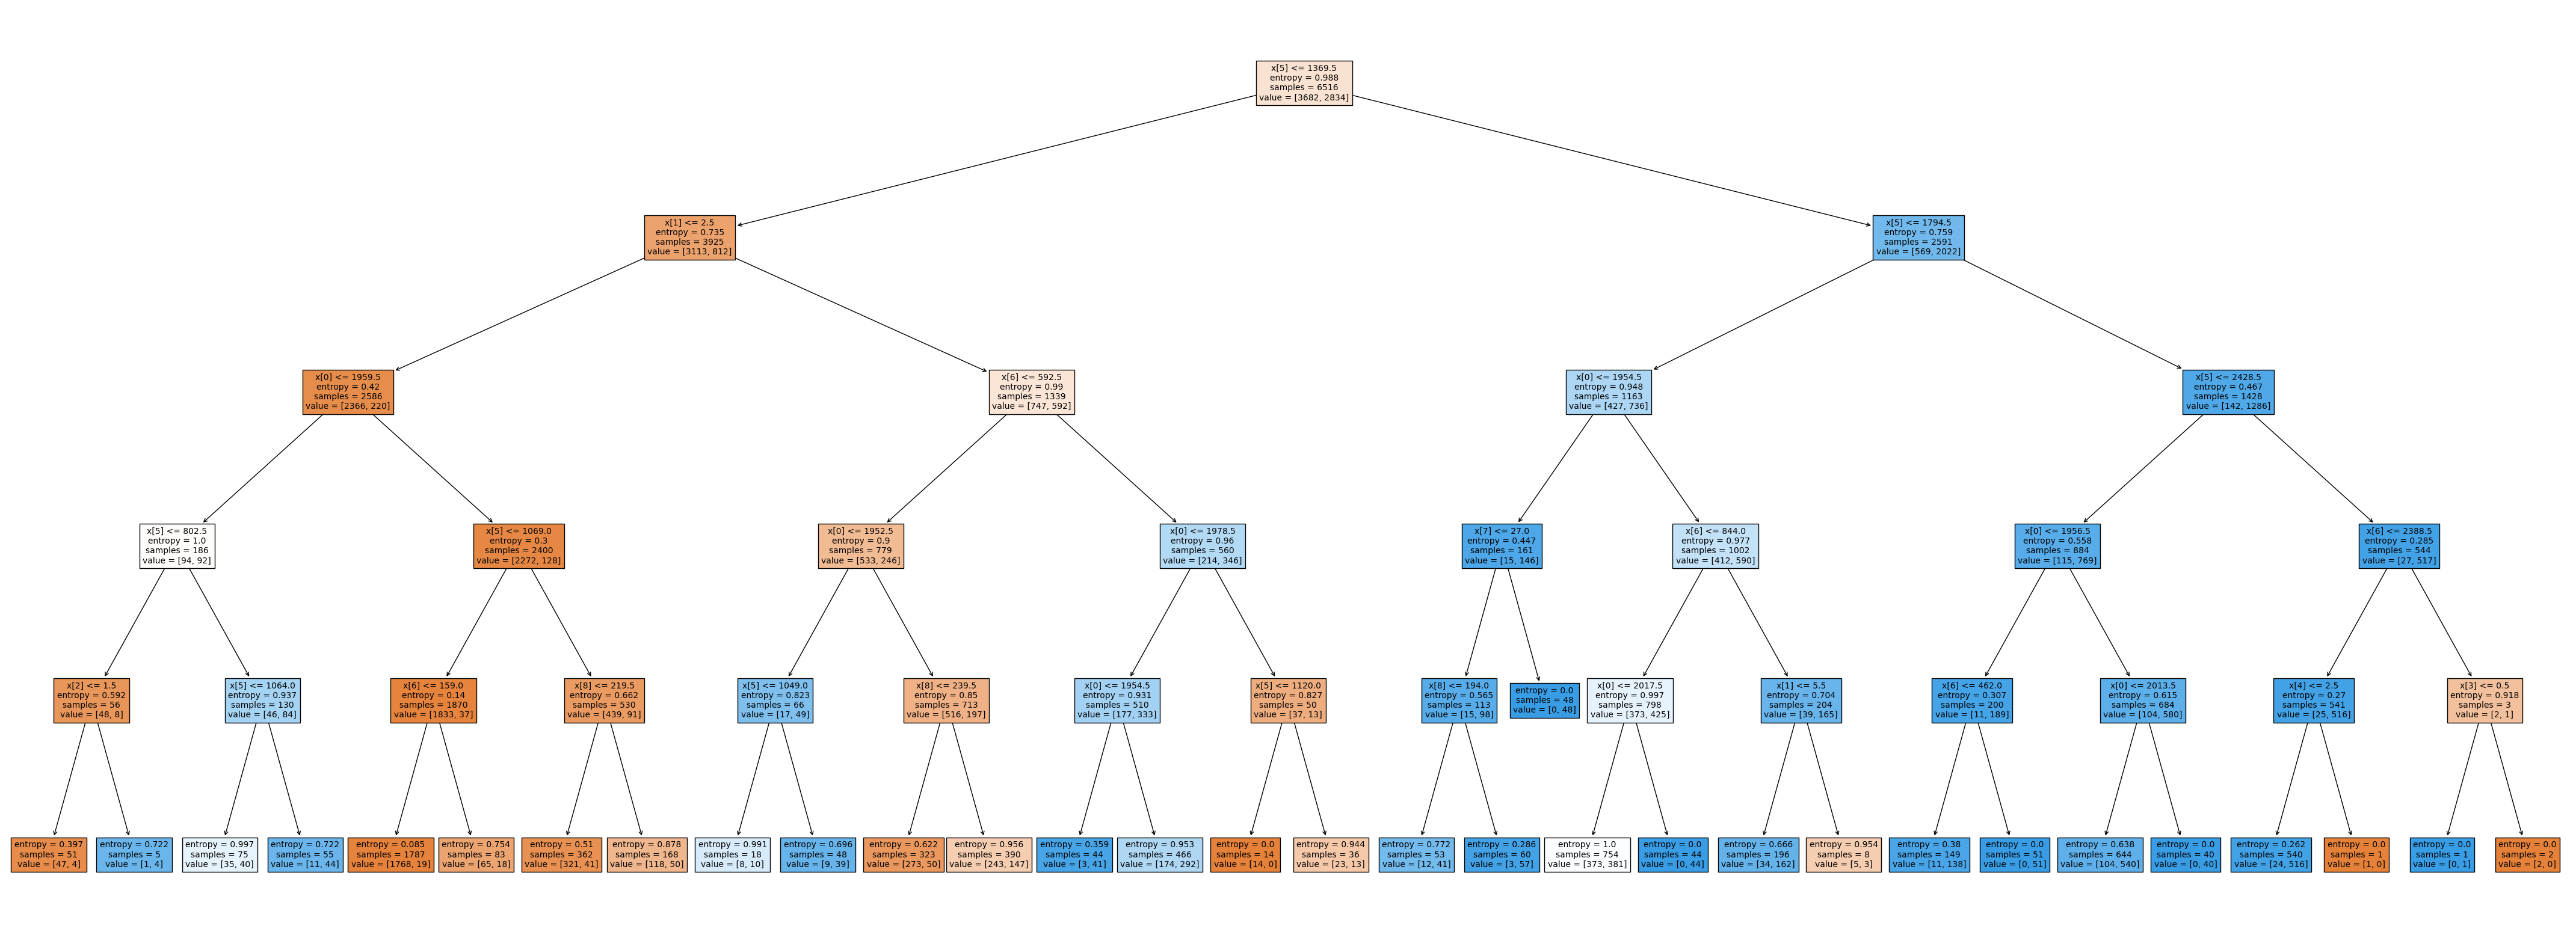

In [34]:
plt.figure(figsize=(55,20))
plot_tree(myTree, fontsize=10,filled=True)
plt.show()

In [13]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')  # Using radial basis function kernel

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       914
           1       0.78      0.79      0.79       715

    accuracy                           0.81      1629
   macro avg       0.81      0.81      0.81      1629
weighted avg       0.81      0.81      0.81      1629

[[757 157]
 [148 567]]


In [14]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix(y_test , y_pred_knn)
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test , y_pred_knn)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       914
           1       0.81      0.79      0.80       715

    accuracy                           0.82      1629
   macro avg       0.82      0.82      0.82      1629
weighted avg       0.82      0.82      0.82      1629



array([[778, 136],
       [150, 565]], dtype=int64)

In [15]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model
y_pred_loj = loj_model.predict(X_test)
print(confusion_matrix(y_test , y_pred_loj))
print(classification_report(y_test, y_pred_loj))

[[798 116]
 [199 516]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       914
           1       0.82      0.72      0.77       715

    accuracy                           0.81      1629
   macro avg       0.81      0.80      0.80      1629
weighted avg       0.81      0.81      0.80      1629



In [16]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

[[885  29]
 [450 265]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       914
           1       0.90      0.37      0.53       715

    accuracy                           0.71      1629
   macro avg       0.78      0.67      0.66      1629
weighted avg       0.77      0.71      0.67      1629



In [17]:
gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=.5)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

[[795 119]
 [143 572]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       914
           1       0.83      0.80      0.81       715

    accuracy                           0.84      1629
   macro avg       0.84      0.83      0.84      1629
weighted avg       0.84      0.84      0.84      1629

